<a href="https://colab.research.google.com/github/mavito/ML_Concepts/blob/main/ML_MatrixDecompositions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Matrix Decompositions in Machine Learning**

A matrix is not merely a table of numbers; it is a machine that transforms space.

- The determinant measures how much this machine stretches volume;

- the eigenvalues measure how much it stretches specific axes;

- and decompositions break this complex machine into a sequence of simpler, understandable operations like rotation and scaling.

## **1.1. The Determinant:**

Formally, the determinant is a function $\det: \mathbb{R}^{n \times n} \to \mathbb{R}$ that assigns a scalar value to a square matrix.

In the context of linear transformations, if a matrix $A$ represents a transformation of space, $\det(A)$ represents the factor by which the transformation scales volumes.

- If $|\det(A)| > 1$, the transformation expands space.If $|\det(A)| < 1$, the transformation compresses space.
- If $\det(A) = 0$, the transformation collapses space into a lower dimension (e.g., squashing a 3D cube onto a 2D plane), indicating the matrix is non-invertible (singular).

To understand the determinant without getting bogged down in arithmetic, imagine a distinct region of space—say, a sponge in the shape of a unit cube (1x1x1).

The matrix $A$ acts like a machine that transforms this sponge.

It might stretch it, rotate it, or shear it.
The determinant tells you how much the volume of that sponge changes after the machine is done with it.
- If the determinant is 2, your sponge is now twice as big (volume-wise).
  - It might be a long, thin string or a flat pancake, but the total amount of "sponge stuff" takes up twice the space.
- If the determinant is 1, the volume hasn't changed.
  - This is like a rotation; if you turn the sponge, it occupies the same amount of space.

**The Critical Case:** If the determinant is 0, it’s as if you put the sponge into a hydraulic press and completely flattened it. It now has zero volume. You can't un-flatten a pancake back into a cube uniquely because you've lost the information about its original depth. This is why a determinant of 0 means you can't "reverse" (invert) the matrix.

## **1.2. The Trace:**
The trace of a square matrix, denoted $\text{tr}(A)$, is the sum of its diagonal elements:$$\text{tr}(A) = \sum_{i=1}^n A_{ii}$$While computationally trivial, the trace is profound because it equals the sum of the eigenvalues of the matrix (counting multiplicity).

It serves as a measure of the "total magnitude" of the eigenvalues.

Think of a matrix as a ledger of transactions among a group of people. The rows represent who gives money, and the columns represent who receives it.

- Off-diagonal terms (like Row 1, Column 2) represent transactions between different people (Person 1 paying Person 2).

- Diagonal terms (Row 1, Column 1) represent money that stays with the person (Person 1 paying themselves, or retaining value).

The Trace is the sum of these diagonal terms. It represents the total amount of "value" or "energy" that stays within the nodes of the system, rather than flowing between them.

In physics or data science, this often correlates to the total "energy" or "variance" contained in the system.

## *Visualizing Determinants*

The following Python code demonstrates the geometric interpretation of the determinant.

It visualizes how a matrix transforms a unit square and calculates the area of the resulting shape to verify it matches the determinant.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def plot_transformation(matrix, title="Transformation"):
    """
    Visualizes the transformation of a unit square by a 2x2 matrix.
    """
    # Define the unit square corners
    # (0,0), (1,0), (1,1), (0,1)
    square = np.array([, , , ])

    # Apply the linear transformation (Matrix multiplication)
    # New_point = A * Old_point
    # We use transpose to align dimensions for matrix multiplication
    transformed_square = np.dot(square, matrix.T)

    # Calculate Determinant
    det = np.linalg.det(matrix)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Original Square
    ax.add_patch(Polygon(square, color='blue', alpha=0.3, label='Original'))
    ax.set_title("Original Unit Square (Area=1)")
    ax.set_xlim(-1, 3)
    ax.set_ylim(-1, 3)
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)

    # Transformed Shape
    ax.add_patch(Polygon(transformed_square, color='red', alpha=0.3, label='Transformed'))
    ax.set_title(f"Transformed Shape\nDeterminant (Area Scale) = {det:.2f}")
    ax.set_xlim(-1, 3)
    ax.set_ylim(-1, 3)
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)

    plt.suptitle(title)
    plt.show()

# Example 1: Scaling Matrix (Determinant = 4)
# Scales x by 2 and y by 2. Total area scaling = 2*2 = 4
A_scale = np.array([,
                    ])
plot_transformation(A_scale, "Scaling Transformation")

# Example 2: Shear Matrix (Determinant = 1)
# Pushes the top of the square to the right, but height stays same. Area unchanged.
A_shear = np.array([,
                    ])
plot_transformation(A_shear, "Shear Transformation")

# Example 3: Singular Matrix (Determinant = 0)
# Collapses 2D space onto a 1D line (x-axis)
A_singular = np.array([,
                       ])
plot_transformation(A_singular, "Singular (Collapsing) Transformation")

SyntaxError: invalid syntax (ipython-input-4267929287.py, line 53)

## Task : The Volume of Transformation

You are given three "Mystery Matrices" below.

For each matrix:

1. Calculate the determinant and trace manually (show your work in markdown).
2. Write Python code using the template above to visualize the transformation.3. Based on the determinant, interpret what the matrix is doing to the data geometrically (e.g., "It is flattening the data," "It is flipping the data").

Mystery Matrices:
1. Matrix A: [, [0, 1/3]]
2. Matrix B: [, ] (Hint: Check the sign of the determinant!)
3. Matrix C: [, ]

Expected Output Format:
- Manual Calculation: $\det(A) = (3)(1/3) - (0)(0) = 1$. Trace = $3 + 1/3 = 3.33$.
- Visual Interpretation: "Matrix A stretches the X-axis by 3 but compresses the Y-axis by 3. Since the determinant is 1, the total area is preserved (squeezing one way, stretching the other)."

In [ ]:
#WRITE CODE HERE

## **2. Eigenvalues and Eigenvectors**

If determinants describe how a matrix changes volume, eigenvalues and eigenvectors describe how it changes direction.

For a square matrix $A$, an eigenvector is a non-zero vector $v$ that, when multiplied by $A$, results in a vector that is parallel to the original $v$. It does not rotate; it only scales.Mathematically:$$Av = \lambda v$$
- $v$ is the Eigenvector (the direction that doesn't change).
- $\lambda$ is the Eigenvalue (the amount $v$ is stretched or shrunk along that direction).

This equation is central to stability analysis, vibration modes in physics, and the famous PageRank algorithm. The set of all eigenvalues of a matrix is called its spectrum.

### **Example 1 : Globe**

Imagine a globe spinning on your desk. Look at the cities on the globe.
- London is spinning in a circle; it changes location constantly.
- The equator is spinning fastest.
- But look at the North Pole. It isn't moving in a circle. It is just spinning in place.

The axis running from the North Pole to the South Pole is the eigenvector of the rotation. It’s the only line that stays in the same orientation while everything else rotates around it.

The eigenvalue tells you if the globe is stretching or shrinking along that axis (for a rigid globe, the eigenvalue is 1).   

### **Example 2 :Elevator**
Imagine you are standing in a glass elevator going up a skyscraper. The elevator shaft is a fixed path—it’s a vector pointing straight up. As the elevator rises, your position changes, but you are still on that same vertical line. You haven't rotated left or right.

- The elevator shaft is the eigenvector.
- The speed at which you are ascending is the eigenvalue.
  - If the eigenvalue were 2, you'd be moving twice as fast.
  - If it were negative, you'd be going down into the basement.   

In Machine Learning, these "stable directions" are crucial. They tell us the main "axes" of our data. If we have a cloud of data shaped like a football, the long axis of the football is the primary eigenvector, and the length of the football is related to the eigenvalue.

In [8]:
#We will use Python to uncover these hidden axes.
#We will create a matrix that stretches space diagonally and use eigendecomposition to find that diagonal axis.
import numpy as np
import matplotlib.pyplot as plt

def visualize_eigenvectors(matrix):
    # 1. Calculate Eigenvalues and Eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    print(f"Matrix:\n{matrix}")
    print(f"Eigenvalues: {eigenvalues}")
    print(f"Eigenvectors:\n{eigenvectors}")

    # 2. Setup vectors to visualize
    # We will plot a few random vectors (blue) and the eigenvectors (red)
    # to see how the matrix transforms them.

    # Create random vectors
    vectors = np.array([, , , [-1, 1]])

    # Apply transformation
    transformed_vectors = np.dot(vectors, matrix.T)

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot original vectors (dashed) and transformed vectors (solid)
    # The Red vectors are the Eigenvectors

    origin =

    # Plot eigenvectors
    for i in range(len(eigenvalues)):
        v = eigenvectors[:, i]
        val = eigenvalues[i]

        # Plot Original Eigenvector (Dashed Red)
        ax.quiver(*origin, *v, color='red', scale=1, scale_units='xy', angles='xy', linestyle='--')

        # Plot Transformed Eigenvector (Solid Red)
        # It should lie exactly on the dashed line, just longer or shorter
        tv = np.dot(matrix, v)
        ax.quiver(*origin, *tv, color='red', scale=1, scale_units='xy', angles='xy', alpha=0.6, label=f'Eigenvector {i+1}')

    # Plot standard vectors for context (Blue)
    # You will see these ROTATE, unlike the red ones.
    ax.quiver(*origin, vectors, vectors, color='blue', scale=1, scale_units='xy', angles='xy', linestyle='--')
    t_vec = np.dot(matrix, vectors)
    ax.quiver(*origin, t_vec, t_vec, color='blue', scale=1, scale_units='xy', angles='xy', label='Standard Vector')

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_title("Eigenvectors (Red) vs Standard Vectors (Blue)")
    ax.legend()
    ax.grid(True)
    plt.show()

# Define a matrix that stretches along the diagonal y=x
# This matrix maps  to  (eigenvalue 4)
# and [-1,1] to [-1,1] (eigenvalue 1)
A = np.array([[2.5, 1.5],
              [1.5, 2.5]])

visualize_eigenvectors(A)

SyntaxError: invalid syntax (ipython-input-3283531533.py, line 19)

## Task 2.1 : Calculate Eigenvalues and visualise Eigenvectors

- Manual Calculation: Calculate the eigenvalues of the matrix $A = [, ]$ by solving the characteristic equation $\det(A - \lambda I) = 0$.
  - (Hint: You will get a quadratic equation).
- Coding: Use the code above to visualize the eigenvectors of this matrix.
- Reflection: In the plot, one eigenvector will be stretched more than the other. Identify which eigenvalue corresponds to the larger stretch. In a machine learning context, if this matrix represented data variance, which eigenvector would be the "Principal Component" (the most important feature)?


In [ ]:
# WRITE CODE HERE

## **3. Cholesky Decomposition**

Imagine you are a painter.

You have three tubes of primary colors: Red, Blue, and Yellow. These are "uncorrelated"—pure sources of color.

This is like random noise in a computer.

Now, you want to create a complex painting where the colors are related—say, a sunset with various shades of Orange and Purple.

You need a recipe to mix the primary colors to get the specific complex palette you want.

The Cholesky Decomposition is that recipe.

- The Covariance Matrix ($A$) describes the final palette you want (e.g., "Color 1 should be very similar to Color 2").
- The Cholesky Factor ($L$) is the mixing instruction. It tells you: "Take 2 parts Red, 1 part Blue, and 0 parts Yellow to make the first pixel."

By applying the Cholesky matrix ($L$) to your pure primary colors (uncorrelated noise), you transform them into the complex, correlated palette (multivariate distribution) you need for your painting.

Cholesky Factor L:
 [[1.  0. ]
 [0.8 0.6]]


AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

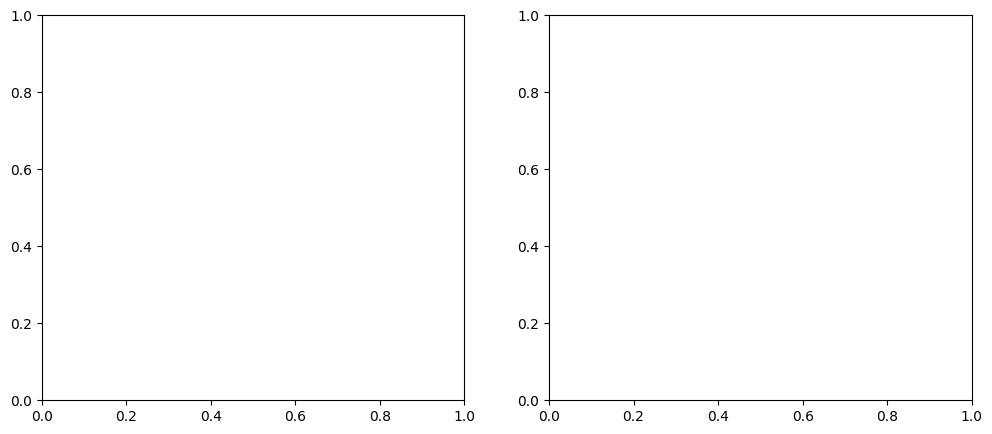

In [9]:
# We will use Cholesky decomposition to simulate two stock prices that tend to move together.
import numpy as np
import matplotlib.pyplot as plt

def generate_correlated_data():
    # 1. Define the Correlation (Covariance) Matrix
    # Variance of Stock A = 1, Stock B = 1
    # Covariance = 0.8 (Highly correlated: when A goes up, B likely goes up)
    Sigma = np.array([[1.0, 0.8],
                      [0.8, 1.0]])

    # 2. Compute Cholesky Decomposition (The "Square Root")
    # L * L.T = Sigma
    L = np.linalg.cholesky(Sigma)
    print("Cholesky Factor L:\n", L)

    # 3. Generate Uncorrelated Random Noise
    # 1000 days of stock movements
    n_samples = 1000
    uncorrelated_data = np.random.randn(2, n_samples)

    # 4. Apply the Cholesky Mixing
    # Correlated Data = L * Uncorrelated Data
    correlated_data = np.dot(L, uncorrelated_data)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot 1: Uncorrelated
    ax.scatter(uncorrelated_data, uncorrelated_data, alpha=0.5, color='gray')
    ax.set_title("Uncorrelated Noise (Circular Blob)")
    ax.set_xlabel("Variable 1")
    ax.set_ylabel("Variable 2")
    ax.axis('equal')

    # Plot 2: Correlated
    ax.scatter(correlated_data, correlated_data, alpha=0.5, color='green')
    ax.set_title("Correlated Data (Stretched Ellipse)")
    ax.set_xlabel("Stock A")
    ax.set_ylabel("Stock B")
    ax.axis('equal')

    plt.show()

generate_correlated_data()

## Task 3.1 : Break Correlation.

**Experiment:**

Try to run the code above using the matrix Sigma_broken = [[1.0, 2.0], [2.0, 1.0]].

**Observation:**

The code will crash with a LinAlgError. Copy the error message into your notebook.

**Diagnosis:**
- Explain why it crashed.
- Calculate the determinant of Sigma_broken.
- Is this matrix Positive Definite? (Hint: A positive definite matrix represents a valid covariance; can a correlation be greater than 1?)

**Fix:**
- Create a new valid covariance matrix where the variables are negatively correlated (e.g., -0.7).
- Generate the plot.
- How does the shape of the green cloud change compared to the positive correlation example?

In [ ]:
#WRITE CODE HERE

## **4. Eigendecomposition and Diagonalization**

Diagonalization is the process of converting a matrix $A$ into a diagonal matrix $D$ (where only elements on the diagonal are non-zero) using a change of basis.$$A = P D P^{-1}$$Here, $D$ contains the eigenvalues, and $P$ contains the eigenvectors.

Imagine you are trying to solve a complex puzzle written in a difficult language (Matrix $A$). The logic is convoluted and hard to follow.Diagonalization is like having a Translation Dictionary ($P$).
- Translate ($P^{-1}$): You translate the puzzle into a very simple language (the "Eigen-language").
- Solve ($D$):
  - In this simple language, the puzzle becomes trivial.
  - The "verbs" (operations) don't tangle with each other; they just act independently.
  - This is the diagonal matrix $D$.
- Translate Back ($P$): Once you've solved it, you translate the answer back to the original language.

Eigendecomposition finds the "native language" of the matrix where coupled, messy interactions become simple, independent actions.

In [10]:
#We will demonstrate the speed difference between naive matrix multiplication and diagonalization.
import numpy as np
import time

def diagonalization_demo():
    # Create a 2x2 diagonalizable matrix
    # A = P * D * P_inv
    # We construct it this way to ensure it has nice integer eigenvalues
    P = np.array([(2,1),
                  (3,4)])
    D = np.array([(9,3),
                  (5,2)])
    P_inv = np.linalg.inv(P)

    A = P @ D @ P_inv
    print(f"Matrix A:\n{A}")

    power = 10

    # Method 1: Naive Multiplication
    start_time = time.time()
    A_naive = A
    for _ in range(power - 1):
        A_naive = A_naive @ A
    print(f"\nNaive A^{power}:\n{A_naive}")

    # Method 2: Diagonalization
    # A^k = P * D^k * P_inv
    start_time = time.time()

    # In practice, we would use np.linalg.eig(A) to find P and D
    # But since we constructed A, we know them.
    # Note how easy D^10 is: just 2^10 and 3^10
    D_power = np.array([[2**power, 0],
                        [0, 3**power]])

    A_diag = P @ D_power @ P_inv
    print(f"Diagonalized A^{power}:\n{A_diag}")

    # Verify results are the same
    assert np.allclose(A_naive, A_diag)
    print("\nSuccess! Both methods yield the same result.")

diagonalization_demo()

Matrix A:
[[13.6 -1.4]
 [27.4 -2.6]]

Naive A^10:
[[ 2.55744271e+10 -2.68797192e+09]
 [ 5.26074504e+10 -5.52924798e+09]]
Diagonalized A^10:
[[ -33791.   23210.]
 [-139260.   93864.]]


AssertionError: 

## Task 4.1 : Markov Chain.

Context:

- In a simple weather model, if it is Sunny today, there is a 0.9 chance it is Sunny tomorrow and 0.1 chance it is Rainy.
- If it is Rainy today, there is a 0.5 chance it is Sunny tomorrow and 0.5 chance it is Rainy.

Matrix:

Construct this transition matrix $T = [[0.9, 0.5], [0.1, 0.5]]$ (Note: columns sum to 1).

Prediction:

Use np.linalg.matrix_power(T, 50) to find the weather probability after 50 days.

Eigendecomposition:
- Use np.linalg.eig(T) to find the eigenvectors.
- Look at the eigenvector corresponding to the eigenvalue of 1.
- Normalize this vector so it sums to 1.

Comparison: Compare this normalized eigenvector to the columns of $T^{50}$. They should be identical.

Explain why in your own words (Hint: Refer to "Steady State").

In [ ]:
#WRITE CODE HERE

## **5. Singular Value Decomposition (SVD) and Matrix Approximation**

SVD is often called the "Fundamental Theorem of Linear Algebra." While Eigendecomposition works only for square matrices, SVD works for any matrix—square, rectangular, tall, or fat.

For any matrix $A \in \mathbb{R}^{m \times n}$, SVD factors it into:$$A = U \Sigma V^\top$$
- $U$: Orthogonal matrix (Left Singular Vectors).
- $\Sigma$: Diagonal matrix containing Singular Values ($\sigma$).

These are always non-negative and sorted largest to smallest.$V^\top$: Orthogonal matrix (Right Singular Vectors).

The Eckart-Young Theorem:
- This theorem makes SVD the "king of compression."
- It states that if you want to approximate a matrix $A$ using a lower-rank matrix (less data), the mathematically best way to do it (minimizing the error) is to keep the largest singular values from $\Sigma$ and set the small ones to zero.

Think of any matrix transformation as a complex machine.
SVD reveals that every machine, no matter how weirdly shaped, is built from just three simple parts:
- A Rotator ($V^\top$): First, it rotates the data.
- A Stretcher ($\Sigma$): Second, it stretches the data along the axes. The "Singular Values" tell you how much stretch happens.
  - Big value = lots of information/stretching.
  - Near-zero value = the data is squashed flat (noise).
- A Rotator ($U$): Finally, it rotates the data again to its final position.


Compression Intuition: Imagine a photo of a zebra.
- Most of the information is "black stripes, white stripes." That's the big structure (Large Singular Values).
- The tiny specks of dust on the camera lens? That's tiny variance (Small Singular Values).

SVD lets us say: "Keep the stripes, delete the dust" by mathematically cutting off the small $\sigma$ values.

In [14]:
from scipy import datasets
img = datasets.face(gray=True)
img

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

Original Image Shape: (768, 1024)


TypeError: 'int' object is not iterable

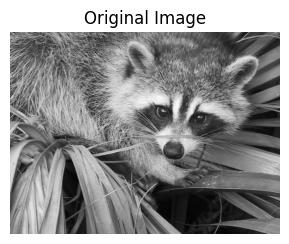

In [15]:
#We will use SVD to compress a grayscale image, demonstrating the Eckart-Young theorem in action.
import numpy as np
import matplotlib.pyplot as plt
from scipy import datasets

def svd_image_compression():
    # 1. Load a sample image (The Raccoon face)
    # This creates a matrix of pixel intensities
    img = datasets.face(gray=True)

    print(f"Original Image Shape: {img.shape}")

    # 2. Perform SVD
    # U: (768, 768), S: (768,), Vt: (1024, 1024)
    U, S, Vt = np.linalg.svd(img, full_matrices=False)

    # 3. Compress
    # We will reconstruct the image using only the top 'k' singular values
    k_values =

    plt.figure(figsize=(16, 6))

    # Plot Original
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    for i, k in enumerate(k_values):
        # Keep top k components
        # Construct diagonal matrix of top k singular values
        S_k = np.diag(S[:k])

        # Select corresponding vectors
        U_k = U[:, :k]
        Vt_k = Vt[:k, :]

        # Reconstruct: A_approx = U_k * S_k * Vt_k
        img_compressed = np.dot(U_k, np.dot(S_k, Vt_k))

        # Plot
        plt.subplot(1, 4, i+2)
        plt.imshow(img_compressed, cmap='gray')
        plt.title(f"k = {k} components")
        plt.axis('off')

        # Calculate Compression Ratio (Roughly)
        original_size = img.size
        compressed_size = U_k.size + k + Vt_k.size
        print(f"k={k}: Compressed size is {compressed_size/original_size:.2%} of original")

    plt.tight_layout()
    plt.show()

    # 4. Plot Singular Values (Scree Plot)
    plt.figure(figsize=(8, 4))
    plt.plot(S)
    plt.title("Scree Plot: Magnitude of Singular Values")
    plt.ylabel("Singular Value (Sigma)")
    plt.xlabel("Index")
    plt.grid(True)
    plt.show()

svd_image_compression()

## Task 5.1: The Recommender System

SVD is also used for recommender systems (like Netflix).

- Create a Matrix: Create a small numpy matrix (users $\times$ movies).
  - Rows = Users (Alice, Bob, Charlie),
  - Cols = Movies (Matrix, Star Wars, Shrek, Toy Story).
  
Fill it with ratings (1-5). Leave some as 0 (unseen).
1. Make Alice and Bob like Sci-Fi (Matrix, Star Wars).
2. Make Charlie like Animation (Shrek, Toy Story).

Apply SVD: Perform SVD with k=2. This forces the data into 2 concepts (e.g., "Sci-Finess" and "Animation-ness").

Reconstruct: Multiply the truncated matrices back together.

Analyze: Look at the reconstructed values for the 0s (unseen movies).

- *Did the algorithm predict a high rating for a Sci-Fi movie for Alice if she hadn't seen it yet?*

This is how "Latent Semantic Analysis" works.

In [ ]:
#WRITE CODE HERE

## **6. Principal Component Analysis (PCA)**

PCA is the most famous application of eigendecomposition and SVD. It is a technique for dimensionality reduction. It rotates the dataset so that the first axis (Principal Component 1) aligns with the direction of maximum variance (information). The second axis aligns with the second most variance, and so on.

Imagine you are holding a teapot. You want to take a 2D photo of this 3D object that captures the most information.

- If you take a photo from the top, you just see a circle (the lid). You lost the spout and handle info.

- If you take a photo from the side, you see the handle and spout. This is the "best" angle.

PCA is an algorithm that automatically rotates the teapot (data) to find that perfect angle where the shadow (projection) is widest (maximum variance). It aligns the camera so that the X-axis of the photo captures the widest part of the teapot, and the Y-axis captures the next widest. It ignores the depth (Z-axis) because that's the "thinnest" part of the data from that angle.   

In [16]:
#We will verify that Eigendecomposition and SVD yield the same result.

import numpy as np

def pca_comparison():
    # Create a random dataset (3 features, 5 samples)
    np.random.seed(42)
    X = np.random.rand(3, 5)

    # 1. CENTER the data (Critical step for PCA)
    # Subtract mean from each row (feature)
    X_centered = X - np.mean(X, axis=1, keepdims=True)

    print("--- Method 1: Eigendecomposition of Covariance ---")
    # Compute Covariance Matrix (n-1 for unbiased estimator)
    cov_matrix = np.cov(X_centered)

    # Find Eigenvalues/Vectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort them (eig doesn't guarantee order)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    print("Eigenvalues (Covariance):", eigenvalues)
    print("Principal Components (Eigenvectors):\n", eigenvectors)

    print("\n--- Method 2: SVD of Data Matrix ---")
    # Apply SVD to centered data
    U, s, Vt = np.linalg.svd(X_centered)

    # U columns are the Left Singular Vectors
    # In this orientation (Features x Samples), U corresponds to eigenvectors of XX'
    print("Left Singular Vectors (U):\n", U)

    # Convert Singular Values to Eigenvalues
    # lambda = s^2 / (N-1)
    n_samples = X.shape
    svd_eigenvalues = (s**2) / (n_samples - 1)
    print("Converted SVD Eigenvalues:", svd_eigenvalues)

    # Check agreement
    print("\nDo Eigenvalues Match?", np.allclose(eigenvalues, svd_eigenvalues))

    # Note: Eigenvectors might have flipped signs (multiplied by -1).
    # This is mathematically valid (vectors point along a line).
    # We check absolute values to confirm direction alignment.
    print("Do Vectors Align?", np.allclose(np.abs(eigenvectors), np.abs(U)))

pca_comparison()

--- Method 1: Eigendecomposition of Covariance ---
Eigenvalues (Covariance): [0.26259876 0.12576512 0.01394636]
Principal Components (Eigenvectors):
 [[ 0.56971241 -0.07760654 -0.81817174]
 [-0.16283179  0.96513696 -0.20493036]
 [ 0.80555173  0.24997574  0.53721369]]

--- Method 2: SVD of Data Matrix ---
Left Singular Vectors (U):
 [[-0.56971241  0.07760654 -0.81817174]
 [ 0.16283179 -0.96513696 -0.20493036]
 [-0.80555173 -0.24997574  0.53721369]]


TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

## Task 6.1: DR on digits.

Load Data: Use sklearn.datasets.load_digits() to load the digits dataset (8x8 pixel images of numbers).

Apply PCA: Use sklearn.decomposition.PCA. Reduce the data from 64 dimensions (8x8) to 2 dimensions.

Visualize: Create a scatter plot of the 2D data. Color the points by their actual digit label (0-9).

Analyze:
- Do similar digits (like 3 and 8) group together?
- Does PCA successfully separate the different numbers without knowing the labels?
- This demonstrates unsupervised clustering power using matrix decomposition.

In [ ]:
#WRITE CODE HERE